In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
pop = pd.read_csv("pop_genres_dataset.csv")
pop.head()

,artists,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,my little airport,每次你走的時分,47,183968,0,0.576,0.505,11,-13.070,0,0.0392,0.753,0.199000,0.151,0.570,127.025,4,cantopop
1,my little airport,下了兩天雨,44,172343,0,0.577,0.228,11,-14.684,1,0.0306,0.834,0.000805,0.384,0.161,119.035,4,cantopop
2,my little airport,詩歌舞街,50,191308,0,0.641,0.479,4,-15.395,1,0.0443,0.732,0.059800,0.115,0.301,121.974,4,cantopop
3,my little airport,那陣時不知道,48,148564,0,0.613,0.210,5,-15.309,1,0.0309,0.769,0.000477,0.139,0.268,132.035,4,cantopop
4,Eason Chan,無條件,54,228973,0,0.646,0.370,0,-10.980,1,0.0351,0.825,0.000005,0.090,0.465,129.914,4,cantopop


# Predicting Genre using kNN

By using energy, acousticness, valence, loudness, and danceability, we will try to use kNNs to predict what genre a song is. Using this model, we can predict what genre a song is based on certain important song characteristics. Since people generally like songs of similar genre, we can recommend songs that match their genre preference.

In [3]:
pop['track_genre'].value_counts()

track_genre
cantopop     1000
indie-pop    1000
j-pop        1000
k-pop        1000
mandopop     1000
pop-film     1000
pop          1000
power-pop    1000
synth-pop    1000
Name: count, dtype: int64

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

### Picking 5 predictors

In [5]:
predictors = ['energy', 'acousticness', 'valence', 'loudness', 'danceability']
target = 'track_genre'

X = pop[predictors]
y = pop[target]

### Training/Testing Split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

### Scaling the data:

In [7]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
knn = KNeighborsClassifier(n_neighbors=5)   # you can try other k values
knn.fit(X_train_scaled, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [10]:
y_pred = knn.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.3288888888888889

Classification Report:
               precision    recall  f1-score   support

    cantopop       0.26      0.44      0.33       200
   indie-pop       0.26      0.29      0.27       200
       j-pop       0.33      0.34      0.33       200
       k-pop       0.32      0.31      0.31       200
    mandopop       0.28      0.25      0.26       200
         pop       0.34      0.27      0.30       200
    pop-film       0.27      0.19      0.22       200
   power-pop       0.55      0.59      0.57       200
   synth-pop       0.39      0.28      0.33       200

    accuracy                           0.33      1800
   macro avg       0.33      0.33      0.33      1800
weighted avg       0.33      0.33      0.33      1800



### Trying multiple K-values

In [11]:
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    print(k, accuracy_score(y_test, knn.predict(X_test_scaled)))

1 0.3277777777777778
2 0.30333333333333334
3 0.32555555555555554
4 0.31333333333333335
5 0.3288888888888889
6 0.32611111111111113
7 0.32555555555555554
8 0.32666666666666666
9 0.3327777777777778
10 0.32722222222222225
11 0.32611111111111113
12 0.32666666666666666
13 0.32166666666666666
14 0.3238888888888889
15 0.32722222222222225
16 0.3244444444444444
17 0.33055555555555555
18 0.32722222222222225
19 0.33
20 0.32666666666666666


The best k-value is k=9 with an accuracy of 0.3328

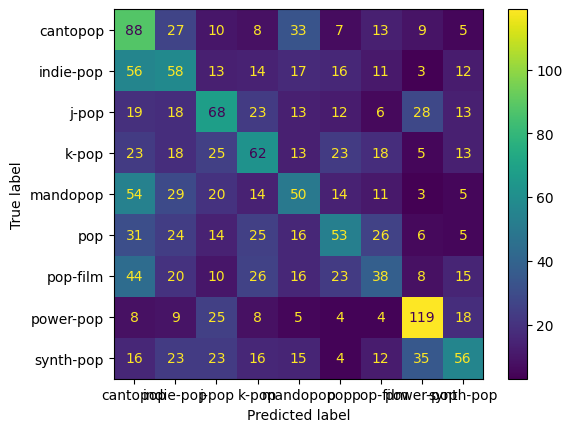

In [14]:
knn = KNeighborsClassifier(n_neighbors=5)   # you can try other k values
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

With k=9, this is the confusion matrix for all the genres. It shows that power-pop is the easiest to predict with these predictors, and it also shows that pop-film is the hardest to predict based on these predictors.